In [1]:
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from csv import DictReader, reader

In [26]:
df_taxonomies = pd.read_csv('taxonomies.csv')
all_taxonomies = list(df_taxonomies[df_taxonomies.num_mapped_classes >= 5]['taxonomy_name'])
len(all_taxonomies)

285

In [27]:
#inconsist_1_ac = list(pd.read_csv("inconsistencies_tt001_ac.csv")['taxonomy_name'])
inconsist_2_ac = list(pd.read_csv("inconsistencies_tt002_ac.csv")['taxonomy_name'])
#inconsist_2_an = list(pd.read_csv("inconsistencies_tt002_an.csv")['taxonomy_name'])
inconsist = set(inconsist_2_ac) # inconsist_1_ac +
#inconsist = set(inconsist_2_an)

In [28]:
len(inconsist)

80

In [29]:
#diverg_1_ac = list(pd.read_csv("divergences_tt001_ac.csv")['taxonomy_name'])
#diverg_1_an = list(pd.read_csv("divergences_tt001_an.csv")['taxonomy_name'])
diverd_2_ac = list(pd.read_csv("divergences_tt002_ac.csv")['taxonomy_name'])
#diverg_2_an = list(pd.read_csv("divergences_tt002_an.csv")['taxonomy_name'])
diverg = set(diverd_2_ac) # diverg_1_ac +
#diverg = set(diverg_2_an) #diverg_1_an +

In [30]:
len(diverg)

90

In [31]:
good_taxonomies = list(set(all_taxonomies) - inconsist - diverg)
good_taxonomies.sort()
print(len(good_taxonomies))
good_taxonomies

187


['abrahao2018agriculture-operations_tx002.ttl',
 'abrahao2018agriculture-operations_tx003.ttl',
 'aguiar2019ooco_tx001.ttl',
 'aires2022valuenetworks-geo_tx002.ttl',
 'aires2022valuenetworks-geo_tx003.ttl',
 'albuquerque2011ontobio_tx012.ttl',
 'alpinebits2022_tx001.ttl',
 'alpinebits2022_tx002.ttl',
 'amaral2019rot_tx002.ttl',
 'amaral2019rot_tx003.ttl',
 'amaral2020rome_tx003.ttl',
 'andrade2023integracao_tx001.ttl',
 'andrade2023integracao_tx002.ttl',
 'aristotle-ontology2019_tx001.ttl',
 'aristotle-ontology2019_tx003.ttl',
 'aristotle-ontology2019_tx004.ttl',
 'aristotle-ontology2019_tx005.ttl',
 'aristotle-ontology2019_tx006.ttl',
 'aristotle-ontology2019_tx007.ttl',
 'aristotle-ontology2019_tx008.ttl',
 'aristotle-ontology2019_tx009.ttl',
 'aristotle-ontology2019_tx010.ttl',
 'aristotle-ontology2019_tx012.ttl',
 'aristotle-ontology2019_tx013.ttl',
 'aristotle-ontology2019_tx016.ttl',
 'aristotle-ontology2019_tx018.ttl',
 'aristotle-ontology2019_tx020.ttl',
 'aristotle-ontology201

In [19]:
with open('valid_taxonomies.txt') as f:
    good_taxonomies = [line.rstrip() for line in f]
len(good_taxonomies)

57

In [32]:
def is_valid(name) -> str:
    name = name.split(os.path.sep)[-1]
    taxonomy_name = name.split('_')[1] + "_" + name.split('_')[4] + ".ttl"
    if taxonomy_name in good_taxonomies:
        return taxonomy_name
    return ""

In [28]:
df = pd.DataFrame(columns=["type", "initial", "final"])
for file_name in glob.glob("*/tt002_ac/statistics_*.csv"):
    if is_valid(file_name):
        with open(file_name, 'r') as file:
            csv_dict_reader = DictReader(file)
            for row in csv_dict_reader:
                initial = int(file_name[-6:-4])
                df.loc[len(df.index)] = ["input", initial, f"{float(row['classif_b_known_classif_types_p']):.2f}"]
                df.loc[len(df.index)] = ["output ac", initial, f"{float(row['classif_a_known_classif_types_p']):.2f}"]
for file_name in glob.glob("*/tt002_an/statistics_*.csv"):
    if is_valid(file_name):
        with open(file_name, 'r') as file:
            csv_dict_reader = DictReader(file)
            for row in csv_dict_reader:
                initial = int(file_name[-6:-4])
                #df.loc[len(df.index)] = ["initial", initial, f"{float(row['classif_b_known_classif_types_p']):.2f}"]
                df.loc[len(df.index)] = ["output an", initial, f"{float(row['classif_a_known_classif_types_p']):.2f}"]
df["final"] = pd.to_numeric(df["final"])

In [29]:
len(df)

15390

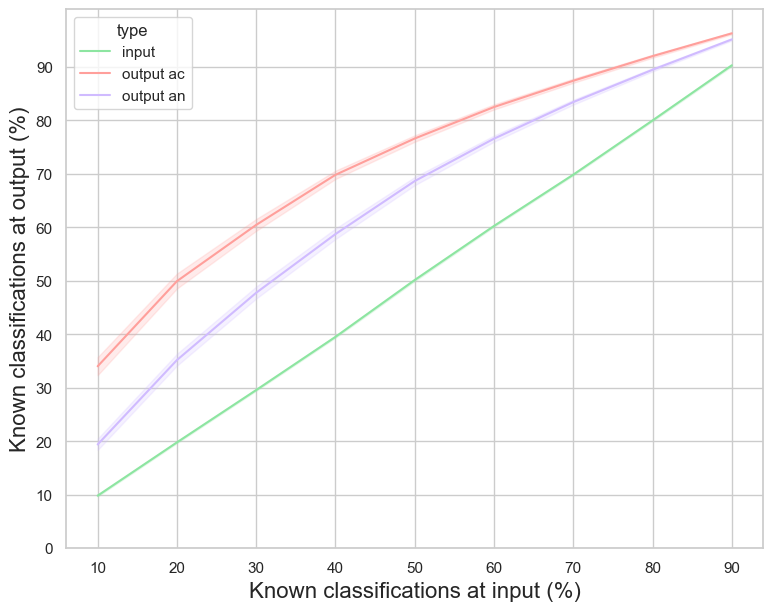

In [30]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.set_theme(style="whitegrid", palette="pastel")
sns.lineplot(x="initial", y="final",
            hue="type", palette=["g", "r", "m"],
            data=df, ax=ax, sort=False)
#wrap_labels(ax, 12)
ax.yaxis.set_ticks(range(0, 100, 10))
#ax.invert_yaxis()
ax.tick_params(axis='y', which='minor')
#sns.despine(offset=10, trim=True)
plt.xlabel('Known classifications at input (%)', fontsize=16)
plt.ylabel('Known classifications at output (%)', fontsize=16)
#plt.title('Test 2, automatic and complete', fontsize=20)
#plt.show()
plt.savefig("is9.png")

In [35]:
df_table = df.loc[(df.type == "output ac") | (df.type == "output an"), :] # ["initial", "final"]

In [36]:
df_table.dtypes

type        object
initial      int64
final      float64
dtype: object

In [37]:
df_mean = df_table.groupby(['type', 'initial'])['final'].mean()
#df_mean.to_csv("is9_ac.csv")

In [38]:
df_mean

type       initial
output ac  10         34.018491
           20         49.934965
           30         60.459070
           40         69.824982
           50         76.618912
           60         82.502474
           70         87.416509
           80         92.018421
           90         96.288035
output an  10         19.397719
           20         35.179789
           30         47.763737
           40         58.740140
           50         68.658439
           60         76.582702
           70         83.424491
           80         89.466825
           90         95.141246
Name: final, dtype: float64

In [190]:
df = pd.DataFrame(columns=["type", "initial", "final"])
for file_name in glob.glob("*/tt002_an/statistics_*.csv"):
    if is_valid(file_name):
        with open(file_name, 'r') as file:
            csv_dict_reader = DictReader(file)
            for row in csv_dict_reader:
                initial = int(file_name[-6:-4])
                df.loc[len(df.index)] = ["initial", initial, f"{float(row['classif_b_known_classif_types_p']):.2f}"]
                df.loc[len(df.index)] = ["final", initial, f"{float(row['classif_a_known_classif_types_p']):.2f}"]
df["final"] = pd.to_numeric(df["final"])

In [191]:
len(df)

10260

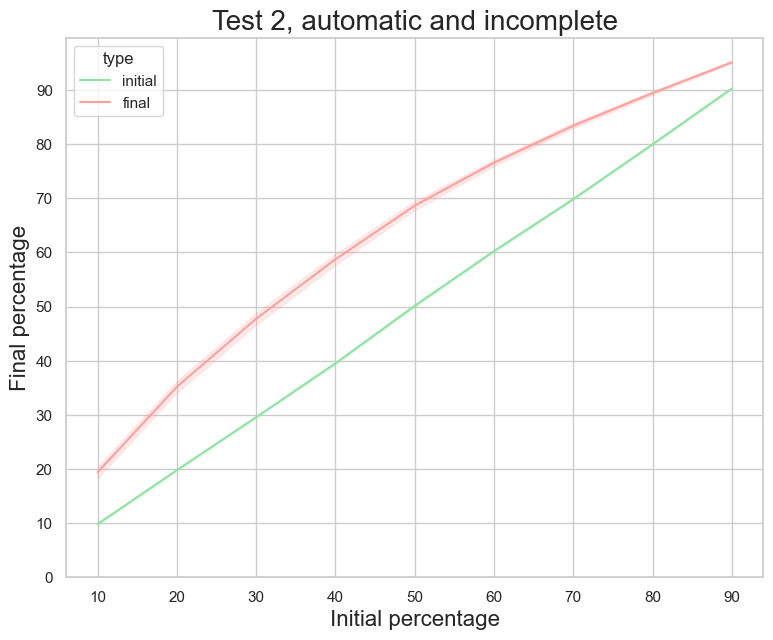

In [192]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.set_theme(style="whitegrid", palette="pastel")
sns.lineplot(x="initial", y="final",
            hue="type", palette=["g", "r"], # "m",
            data=df, ax=ax, sort=False)
#wrap_labels(ax, 12)
ax.yaxis.set_ticks(range(0, 100, 10))
#ax.invert_yaxis()
ax.tick_params(axis='y', which='minor')
#sns.despine(offset=10, trim=True)
plt.xlabel('Initial percentage', fontsize=16)
plt.ylabel('Final percentage', fontsize=16)
plt.title('Test 2, automatic and incomplete', fontsize=20)
#plt.show()
plt.savefig("is9_an.png")

In [193]:
df_table = df.loc[df.type=="final", ["initial", "final"]]

In [194]:
df_table.dtypes

initial      int64
final      float64
dtype: object

In [195]:
df_mean = df_table.groupby(['initial', 'type'])['final'].mean()
df_mean.to_csv("is9_an.csv")

In [48]:
df = pd.DataFrame(columns=["type", "initial", "final"])
for file_name in glob.glob("*/tt002_ac/statistics_*.csv"):
    if is_valid(file_name):
        with open(file_name, 'r') as file:
            csv_dict_reader = DictReader(file)
            for row in csv_dict_reader:
                initial = int(file_name[-6:-4])
                df.loc[len(df.index)] = ["tu ac", initial, f"{float(row['classes_a_tu_classes_types_p']):.2f}"]
                df.loc[len(df.index)] = ["pk ac", initial, f"{float(row['classes_a_pk_classes_types_p']):.2f}"]
                df.loc[len(df.index)] = ["tk ac", initial, f"{float(row['classes_a_tk_classes_types_p']):.2f}"]
df["final"] = pd.to_numeric(df["final"])

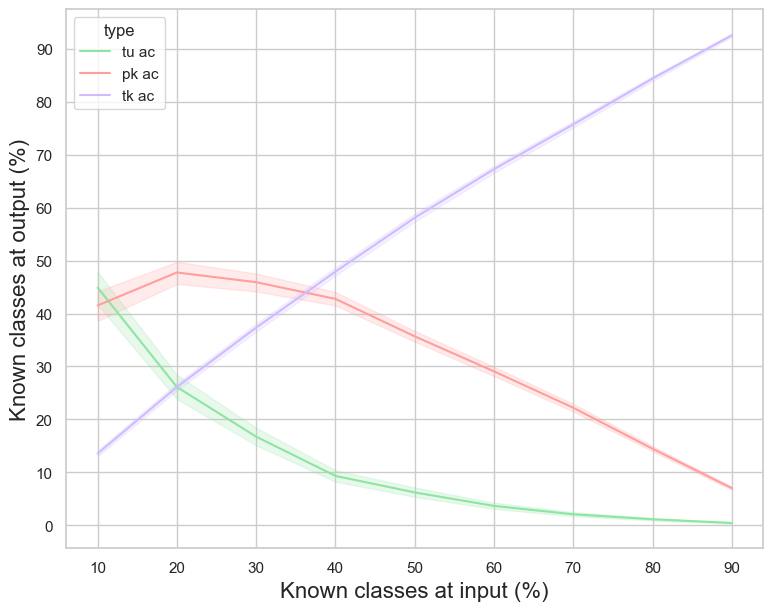

In [49]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.set_theme(style="whitegrid", palette="pastel")
sns.lineplot(x="initial", y="final",
             hue="type", palette=["g", "r", "m"],
             data=df, ax=ax, sort=False)
#wrap_labels(ax, 12)
ax.yaxis.set_ticks(range(0, 100, 10))
#ax.invert_yaxis()
ax.tick_params(axis='y', which='minor')
#sns.despine(offset=10, trim=True)
plt.xlabel('Known classes at input (%)', fontsize=16)
plt.ylabel('Known classes at output (%)', fontsize=16)
#plt.show()
plt.savefig("is14_ac.png")

In [50]:
df_mean = df.groupby(['type', 'initial'])['final'].mean()
df_mean.to_csv("is14_ac.csv")

In [43]:
df = pd.DataFrame(columns=["type", "initial", "final"])
for file_name in glob.glob("*/tt002_an/statistics_*.csv"):
    if is_valid(file_name):
        with open(file_name, 'r') as file:
            csv_dict_reader = DictReader(file)
            for row in csv_dict_reader:
                initial = int(file_name[-6:-4])
                df.loc[len(df.index)] = ["tu an", initial, f"{float(row['classes_a_tu_classes_types_p']):.2f}"]
                df.loc[len(df.index)] = ["pk an", initial, f"{float(row['classes_a_pk_classes_types_p']):.2f}"]
                df.loc[len(df.index)] = ["tk an", initial, f"{float(row['classes_a_tk_classes_types_p']):.2f}"]
df["final"] = pd.to_numeric(df["final"])

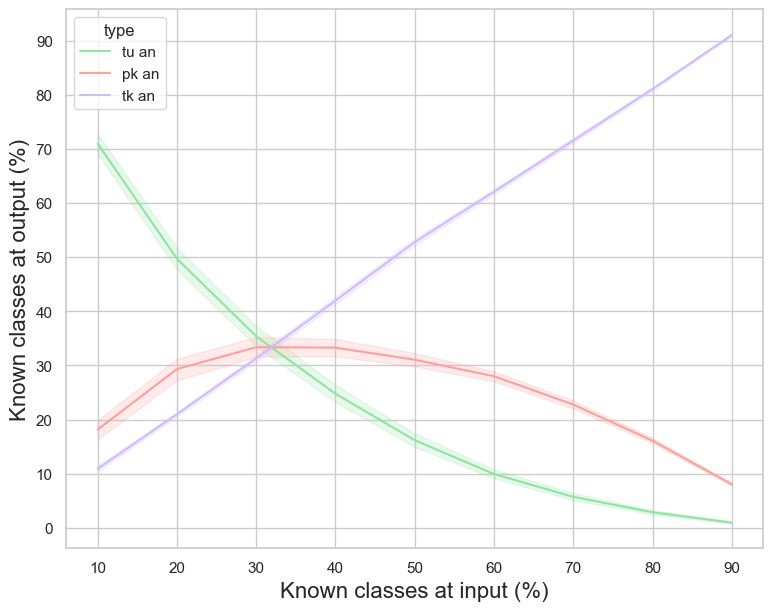

In [44]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.set_theme(style="whitegrid", palette="pastel")
sns.lineplot(x="initial", y="final",
             hue="type", palette=["g", "r", "m"],
             data=df, ax=ax, sort=False)
#wrap_labels(ax, 12)
ax.yaxis.set_ticks(range(0, 100, 10))
#ax.invert_yaxis()
ax.tick_params(axis='y', which='minor')
#sns.despine(offset=10, trim=True)
plt.xlabel('Known classes at input (%)', fontsize=16)
plt.ylabel('Known classes at output (%)', fontsize=16)
#plt.show()
plt.savefig("is14_an.png")

### Matrix generation

In [21]:
taxonomy_length = {}

for good_taxonomy in good_taxonomies:
    folder_name = good_taxonomy.split("_")[0]
    for file_name in glob.glob(f"{folder_name}{os.path.sep}data_{good_taxonomy[:-4]}.csv"):
        with open(file_name, 'r') as file:
            taxonomy_length[good_taxonomy] = sum(1 for line in file) - 1

In [22]:
taxonomy_length

{'abrahao2018agriculture-operations_tx002.ttl': 6,
 'abrahao2018agriculture-operations_tx003.ttl': 7,
 'aguiar2018rdbs-o_tx001.ttl': 26,
 'aguiar2019ooco_tx001.ttl': 7,
 'aguiar2019ooco_tx002.ttl': 32,
 'aires2022valuenetworks-geo_tx002.ttl': 6,
 'aires2022valuenetworks-geo_tx003.ttl': 7,
 'albuquerque2011ontobio_tx002.ttl': 8,
 'albuquerque2011ontobio_tx007.ttl': 8,
 'albuquerque2011ontobio_tx012.ttl': 39,
 'alpinebits2022_tx001.ttl': 7,
 'alpinebits2022_tx002.ttl': 49,
 'amaral2019rot_tx002.ttl': 5,
 'amaral2019rot_tx003.ttl': 26,
 'amaral2020rome_tx003.ttl': 19,
 'amaral2022ethical-requirements_tx002.ttl': 10,
 'andrade2023integracao_tx001.ttl': 6,
 'andrade2023integracao_tx002.ttl': 17,
 'aristotle-ontology2019_tx001.ttl': 5,
 'aristotle-ontology2019_tx003.ttl': 6,
 'aristotle-ontology2019_tx004.ttl': 5,
 'aristotle-ontology2019_tx005.ttl': 5,
 'aristotle-ontology2019_tx006.ttl': 6,
 'aristotle-ontology2019_tx007.ttl': 9,
 'aristotle-ontology2019_tx008.ttl': 6,
 'aristotle-ontology

In [12]:
for complete in ["an"]: #"ac"
    matrix = np.zeros((9,15), dtype=float)
    for percentage in range(1, 10, 1):
        temp = np.zeros((15,15), dtype=float)
        for file_name in glob.glob(f"*/tt002_{complete}/results/matrix_*_pc0{percentage}0.csv"):
            taxonomy_name = is_valid(file_name)
            if taxonomy_name:
                result = np.array(list(reader(open(file_name, "r"), delimiter=","))).astype('float')
                result /= taxonomy_length[taxonomy_name]
                temp += result
        total = sum(sum(temp))
        temp *= 100
        temp /=total
        matrix[percentage-1,:] = matrix[percentage-1,:] + temp[0,:]
    np.savetxt(f"matrixes_{complete}.csv", matrix, delimiter=",")

C:\Users\emozz\AppData\Local\Temp\ipykernel_9200\1948535755.py:13: RuntimeWarning: invalid value encountered in divide
  temp /=total


In [33]:
for complete in ["ac"]: #"an"
    matrix = np.zeros((4,15), dtype=float)
    idx = 0
    for percentage in range(2, 10, 2):
        temp = np.zeros((15,15), dtype=float)
        for file_name in glob.glob(f"*/tt002_{complete}/results/matrix_*_pc0{percentage}0.csv"):
            taxonomy_name = is_valid(file_name)
            if taxonomy_name:
                result = np.array(list(reader(open(file_name, "r"), delimiter=","))).astype('float')
                result /= taxonomy_length[taxonomy_name]
                temp += result
        total = sum(sum(temp))
        temp *= 100
        temp /=total
        matrix[idx,:] = matrix[idx,:] + temp[0,:]
        idx += 1
    np.savetxt(f"matrixes_{complete}.csv", matrix, delimiter=",")

<AxesSubplot: >

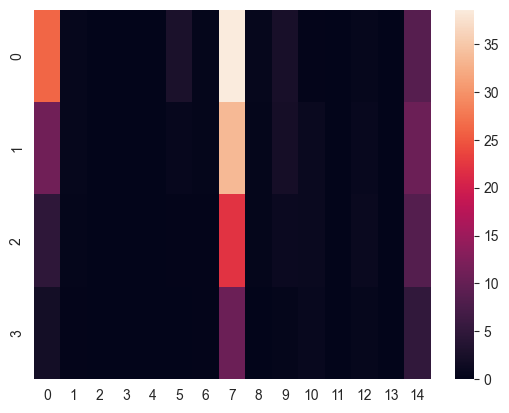

In [34]:
sns.heatmap(matrix)